# Statistics Advanced - 2 Assignment

### Question 1: What is hypothesis testing in statistics?

**Answer:**
Hypothesis testing is a formal statistical procedure used to make data-driven decisions about population parameters based on sample data. At its core, hypothesis testing translates a research question into two competing statements:

- The **null hypothesis (H0)** — a default statement that there is no effect or no difference. It represents the status quo or a baseline assumption.
- The **alternative hypothesis (H1 or Ha)** — the statement that indicates the presence of an effect, difference, or relationship that the analyst seeks evidence for.

The testing process involves selecting an appropriate test statistic (e.g., z, t, chi-square) whose sampling distribution under the null hypothesis is known or can be approximated. We compute this statistic from sample data and compare it to the distribution under H0 to determine how extreme the observed result is. If the observed statistic is sufficiently unlikely under H0 (typically judged by a p-value below a pre-chosen significance level), we reject H0 in favor of H1.

Key components and steps:
1. Define H0 and H1 clearly.
2. Choose a significance level (α), commonly 0.05.
3. Determine the appropriate test and test statistic.
4. Compute the test statistic from sample data and its p-value.
5. Make a decision: reject or fail to reject H0, and interpret the result in context.

Hypothesis testing is widely used in science, business, and policy to evaluate claims, compare groups, and infer whether observed patterns likely reflect real effects or random chance.

### Question 2: What is the null hypothesis, and how does it differ from the alternative hypothesis?

**Answer:**
The **null hypothesis (H0)** is a precise statement asserting that there is no effect, no difference, or no relationship in the population. It is the hypothesis we assume true unless there is strong evidence otherwise. The **alternative hypothesis (H1 or Ha)** is the statement that contradicts H0 and represents the research claim — that some effect, difference, or relationship exists.

Differences:
- **Purpose:** H0 is the default assumption; H1 is what the researcher aims to support.
- **Formulation:** H0 often includes an equality (e.g., μ = μ0), while H1 uses inequality (e.g., μ ≠ μ0, μ > μ0, or μ < μ0).
- **Decision rule:** Statistical tests evaluate whether observed data are unlikely under H0; if so, H0 is rejected in favor of H1.

Example: If evaluating whether a new fertilizer changes mean crop yield from 100 kg/plot, we set
- H0: mean = 100
- H1: mean ≠ 100 (two-sided)

A rejection of H0 suggests evidence that the fertilizer changes yield; failing to reject H0 indicates insufficient evidence to claim a change (but does not confirm H0 true).

### Question 3: Explain the significance level in hypothesis testing and its role in deciding the outcome of a test.

**Long Answer:**
The **significance level**, denoted α, is the threshold probability used to decide whether an observed test statistic is extreme under the null hypothesis. It represents the maximum acceptable probability of committing a **Type I error** — rejecting H0 when it is actually true.

Common choices for α are 0.05, 0.01, and 0.10. If the p-value of the test (the probability, under H0, of obtaining a result as extreme or more extreme than observed) is less than or equal to α, we reject H0; otherwise, we fail to reject H0.

Role in decision-making:
- Controls false positives: a lower α reduces the chance of falsely declaring an effect.
- Trades off with power: reducing α makes it harder to detect true effects (increasing Type II error probability), so one must balance risk of false positives against sensitivity.

Interpretation caution: A 5% significance level does not mean the observed result has a 95% chance of being true — it only bounds the long-run frequency of incorrectly rejecting true null hypotheses when the same testing procedure is repeated many times under H0.

### Question 4: What are Type I and Type II errors? Give examples of each.

**Answer:**
Type I and Type II errors describe the two possible mistakes in hypothesis testing:

- **Type I error (false positive):** Rejecting the null hypothesis when it is actually true. Its probability is the significance level α.
  - *Example:* A medical trial concludes that a new drug is effective when in reality it has no effect. If α = 0.05, we accept a 5% chance of wrongly approving an ineffective drug.

- **Type II error (false negative):** Failing to reject the null hypothesis when the alternative hypothesis is true. The probability of a Type II error is denoted β. The **power** of a test is 1 − β, the probability of correctly rejecting H0 when H1 is true.
  - *Example:* A test fails to detect that a disease screening method is better than the current standard when it actually is, leading to missed opportunities for improved detection.

Trade-offs: lowering α decreases Type I errors but generally increases Type II errors (reduces power), unless sample size or effect size are increased. Experimental design, sample size, and effect magnitude influence both error rates.

### Question 5: What is the difference between a Z-test and a T-test? Explain when to use each.

**Answer:**
Both Z-tests and T-tests are used for inference about population means, but they differ in assumptions about the population standard deviation and sample size:

- **Z-test:** Used when the population standard deviation σ is known, or when the sample size is large enough that the sampling distribution of the mean can be approximated as normal with known variance (by CLT). The test statistic is:
  Z = (X̄ − μ0) / (σ / √n).
  The Z statistic is compared to the standard normal distribution.

- **T-test:** Used when the population standard deviation is unknown and the sample standard deviation s is used instead; particularly appropriate for small samples from approximately normal populations. The test statistic is:
  T = (X̄ − μ0) / (s / √n),
  which follows Student's t-distribution with n−1 degrees of freedom under H0.

When to use which:
- Use the Z-test if σ is known (rare in practice) or for large samples where CLT ensures normality and the sample variance is a reliable proxy.
- Use the T-test when σ is unknown (common case), especially for small to moderate sample sizes. As n grows, the t-distribution converges to the normal distribution, so t and z tests produce similar results for large n.

Practical note: In many real-world scenarios, researchers use the t-test as a default for mean inference unless a well-justified known population variance is available.

### Question 6: Generate a binomial distribution with n=10 and p=0.5, then plot its histogram.

Possible outcomes (0..10) and counts:
0: 13
1: 110
2: 450
3: 1216
4: 2007
5: 2497
6: 2010
7: 1170
8: 426
9: 90
10: 11


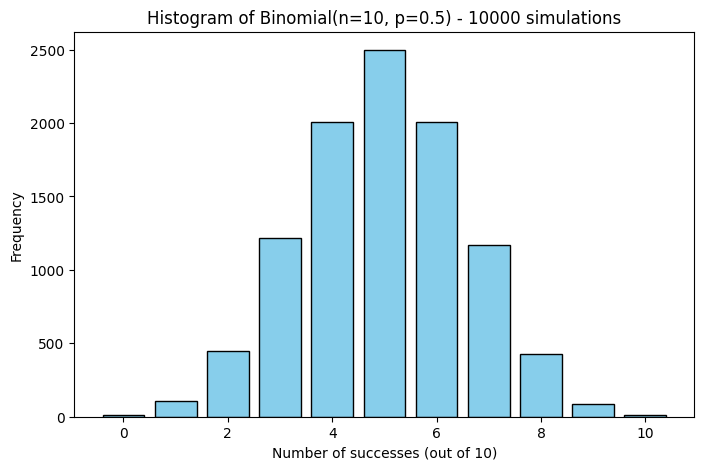

In [1]:
# Question 6: Binomial distribution (n=10, p=0.5) histogram
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# simulate many binomial draws (each draw is number of successes in 10 trials)
samples = np.random.binomial(n=10, p=0.5, size=10000)

# compute frequencies
values, counts = np.unique(samples, return_counts=True)

print("Possible outcomes (0..10) and counts:")
for v, c in zip(values, counts):
    print(f"{v}: {c}")

# plot histogram
plt.figure(figsize=(8,5))
plt.bar(values, counts, color='skyblue', edgecolor='k')
plt.xlabel('Number of successes (out of 10)')
plt.ylabel('Frequency')
plt.title('Histogram of Binomial(n=10, p=0.5) - 10000 simulations')
plt.show()

### Question 7: Implement hypothesis testing using Z-statistics for the provided sample dataset. Interpret the results.

In [2]:
# Question 7: Z-test (one-sample) for sample_data vs H0: mu = 50
import numpy as np
from math import sqrt
from scipy import stats

sample_data = [49.1, 50.2, 51.0, 48.7, 50.5, 49.8, 50.3, 50.7, 50.2, 49.6,
               50.1, 49.9, 50.8, 50.4, 48.9, 50.6, 50.0, 49.7, 50.2, 49.5,
               50.1, 50.3, 50.4, 50.5, 50.0, 50.7, 49.3, 49.8, 50.2, 50.9,
               50.3, 50.4, 50.0, 49.7, 50.5, 49.9]

arr = np.array(sample_data)
n = arr.size
sample_mean = arr.mean()
sample_std = arr.std(ddof=1)

# We will test H0: mu = 50 vs H1: mu != 50 using a Z-test.
# Note: A true Z-test assumes known population std (sigma). In practice sigma is often unknown.
# Here we'll demonstrate the Z-statistic assuming an estimated sigma from the sample (approximation).
# Also we will show the t-test result (more appropriate when sigma unknown).

mu0 = 50.0

# Z-statistic using sample standard deviation as plug-in (approx)
z_stat = (sample_mean - mu0) / (sample_std / sqrt(n))
p_value_z_two_tailed = 2 * (1 - stats.norm.cdf(abs(z_stat)))

# t-test (recommended when sigma unknown)
t_stat, p_value_t = stats.ttest_1samp(arr, popmean=mu0)

print(f"n = {n}")
print(f"Sample mean = {sample_mean:.4f}")
print(f"Sample std (s) = {sample_std:.4f}")
print(f"Z-statistic (approx using s): {z_stat:.4f}")
print(f"Two-tailed p-value (z approx): {p_value_z_two_tailed:.6f}")
print()
print(f"T-statistic (scipy t-test): {t_stat:.4f}")
print(f"Two-tailed p-value (t-test): {p_value_t:.6f}")

# Interpretation:
alpha = 0.05
print('\nInterpretation at alpha = 0.05:')
if p_value_t < alpha:
    print('Reject H0: Evidence that the mean differs from 50.')
else:
    print('Fail to reject H0: Insufficient evidence that the mean differs from 50.')

# Note: Because population sigma is unknown, the t-test is the more appropriate test here.


n = 36
Sample mean = 50.0889
Sample std (s) = 0.5365
Z-statistic (approx using s): 0.9940
Two-tailed p-value (z approx): 0.320210

T-statistic (scipy t-test): 0.9940
Two-tailed p-value (t-test): 0.327033

Interpretation at alpha = 0.05:
Fail to reject H0: Insufficient evidence that the mean differs from 50.


### Question 8: Simulate data from a normal distribution and calculate the 95% confidence interval for its mean. Plot the data.

Sample size: 50
Sample mean = 99.6173
Sample std (s) = 14.6915
95% CI for mean = (95.4420, 103.7926)


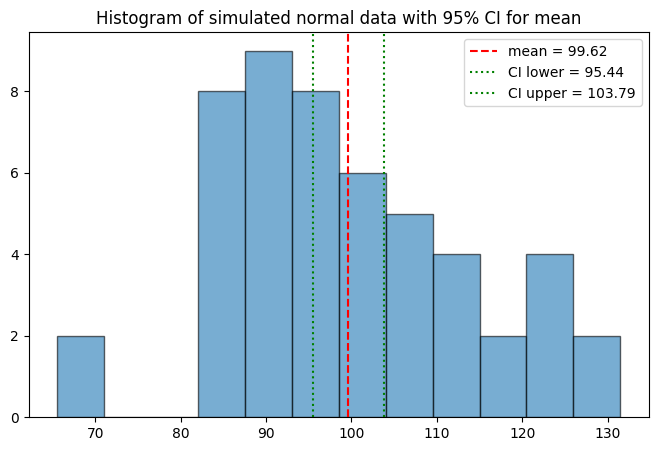

In [3]:
# Question 8: simulate normal data and compute 95% CI for mean
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from math import sqrt

np.random.seed(1)
# simulate data
mu_true = 100
sigma_true = 15
n = 50
data = np.random.normal(loc=mu_true, scale=sigma_true, size=n)

# sample stats
xbar = data.mean()
s = data.std(ddof=1)

# t-critical value
alpha = 0.05
df = n - 1
t_crit = stats.t.ppf(1 - alpha/2, df)

margin = t_crit * s / sqrt(n)
ci_lower = xbar - margin
ci_upper = xbar + margin

print(f"Sample size: {n}")
print(f"Sample mean = {xbar:.4f}")
print(f"Sample std (s) = {s:.4f}")
print(f"95% CI for mean = ({ci_lower:.4f}, {ci_upper:.4f})")

# Plot histogram with vertical lines for mean and CI
plt.figure(figsize=(8,5))
plt.hist(data, bins=12, edgecolor='k', alpha=0.6)
plt.axvline(xbar, color='red', linestyle='--', label=f"mean = {xbar:.2f}")
plt.axvline(ci_lower, color='green', linestyle=':', label=f"CI lower = {ci_lower:.2f}")
plt.axvline(ci_upper, color='green', linestyle=':', label=f"CI upper = {ci_upper:.2f}")
plt.title('Histogram of simulated normal data with 95% CI for mean')
plt.legend()
plt.show()

### Question 9: Function to calculate Z-scores from a dataset and visualize standardized data. Explain Z-scores meaning.

Original data: [55, 49, 60, 48, 52, 47, 58, 51, 50, 53]
Z-scores: [ 0.6665 -0.8146  1.9008 -1.0615 -0.0741 -1.3083  1.4071 -0.3209 -0.5678
  0.1728]

Interpretation:
A Z-score indicates how many standard deviations an observation is from the mean.
Positive Z -> above mean; Negative Z -> below mean. |Z| > 2 often indicates an outlier (depending on context).


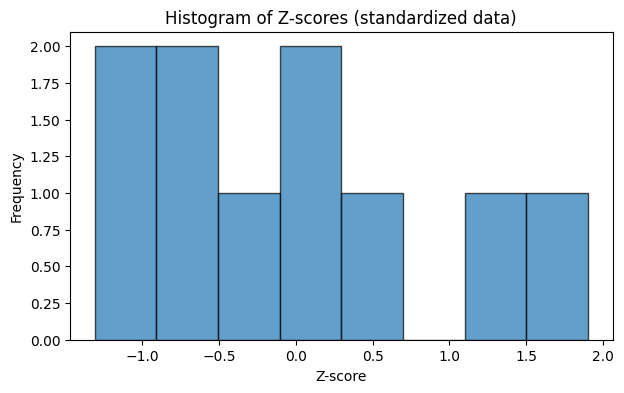

In [4]:
# Question 9: compute Z-scores and plot standardized histogram
import numpy as np
import matplotlib.pyplot as plt

def z_scores(data):
    arr = np.array(data, dtype=float)
    mu = arr.mean()
    sigma = arr.std(ddof=0)  # population std for standardization
    return (arr - mu) / sigma

# Example dataset
data_example = [55, 49, 60, 48, 52, 47, 58, 51, 50, 53]

zs = z_scores(data_example)
print("Original data:", data_example)
print("Z-scores:", np.round(zs, 4))

# Explanation (printed)
print("\nInterpretation:")
print("A Z-score indicates how many standard deviations an observation is from the mean.")
print("Positive Z -> above mean; Negative Z -> below mean. |Z| > 2 often indicates an outlier (depending on context).")

# Plot histogram of Z-scores
plt.figure(figsize=(7,4))
plt.hist(zs, bins=8, edgecolor='k', alpha=0.7)
plt.title('Histogram of Z-scores (standardized data)')
plt.xlabel('Z-score'); plt.ylabel('Frequency')
plt.show()